# Wealth Forecaster

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
import logging

In [2]:
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [3]:
def forecast_net_worth(starting_capital, investment_per_year, growth_rate, years):
    net_worth = [starting_capital]
    for year in range(1, years + 1):
        new_value = net_worth[-1] * (1 + growth_rate / 100) + investment_per_year
        net_worth.append(new_value)
    return np.array(net_worth)

In [4]:
logger.debug(forecast_net_worth(10000, 1000, 5, 30))

2024-08-23 20:08:11,569 - DEBUG - [ 10000.          11500.          13075.          14728.75
  16465.1875      18288.446875    20202.86921875  22213.01267969
  24323.66331367  26539.84647936  28866.83880332  31310.18074349
  33875.68978066  36569.4742697   39397.94798318  42367.84538234
  45486.23765146  48760.54953403  52198.57701073  55808.50586127
  59598.93115433  63578.87771205  67757.82159765  72145.71267753
  76752.99831141  81590.64822698  86670.18063833  92003.68967025
  97603.87415376 103484.06786145 109658.27125452]


In [5]:
def plot_forecast(starting_capital, investment_per_year, growth_rate, years):
    net_worth = forecast_net_worth(starting_capital, investment_per_year, growth_rate, years)
    
    # Create a Seaborn line plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=np.arange(0, years + 1), y=net_worth, marker='o', color='b')
    
    plt.title('Forecast of Future Net Worth Over Time', fontsize=16)
    plt.xlabel('Years', fontsize=14)
    plt.ylabel('Net Worth ($)', fontsize=14)
    
    # Set y-scale to the next highest power of 10 or half of it
    max_value = np.max(net_worth)
    next_power_of_10 = 10 ** np.ceil(np.log10(max_value))
    if max_value < next_power_of_10 / 2:
        plt.ylim(0, next_power_of_10 / 2)
    else:
        plt.ylim(0, next_power_of_10)
    
    plt.show()

2024-08-23 20:08:11,590 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2024-08-23 20:08:11,590 - DEBUG - findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-08-23 20:08:11,591 - DEBUG - findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2024-08-23 20:08:11,591 - DEBUG - findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2024-08-23 20:08:11,591 - DEBUG - f

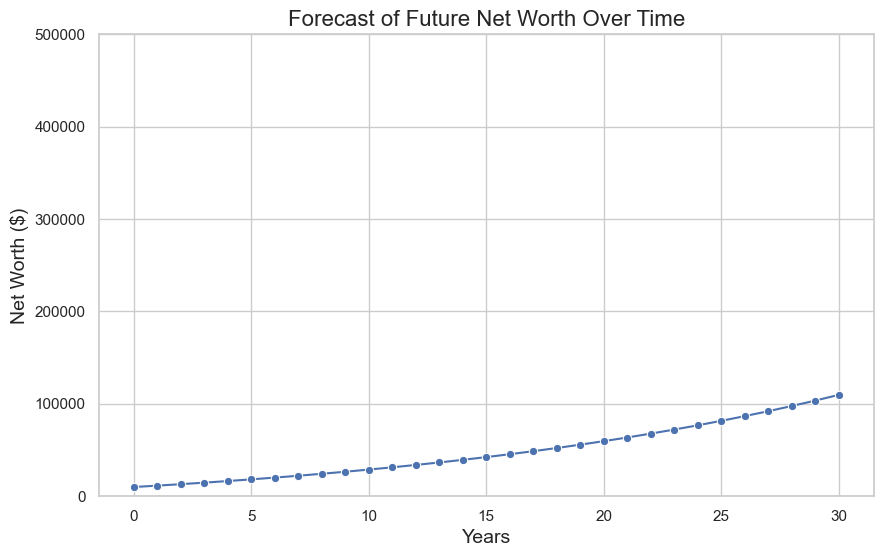

In [6]:
if logger.level <= logging.DEBUG:
    plot_forecast(10000, 1000, 5, 30)

In [7]:
# Define the range of years and other parameters
years_slider = widgets.IntSlider(value=20, min=1, max=50, step=1, description='Years')
starting_capital_slider = widgets.FloatSlider(value=10000, min=1000, max=100000, step=1000, description='Starting Capital ($)')
investment_per_year_slider = widgets.FloatSlider(value=5000, min=0, max=50000, step=1000, description='Investment Per Year ($)')
growth_rate_slider = widgets.FloatSlider(value=5, min=0, max=20, step=0.1, description='Growth Rate (%)')

# Use interact to create an interactive plot
interact(plot_forecast, 
         starting_capital=starting_capital_slider, 
         investment_per_year=investment_per_year_slider, 
         growth_rate=growth_rate_slider, 
         years=years_slider)


interactive(children=(FloatSlider(value=10000.0, description='Starting Capital ($)', max=100000.0, min=1000.0,…

<function __main__.plot_forecast(starting_capital, investment_per_year, growth_rate, years)>